# Twitter API

Obtain Tweets from Twitter API by using Tweepy (an easy-to-use Python Library)

to use Tweepy 
1. Make sure you have a twitter developer account (apps.twitter.com)
2. Install python and tweepy
3. Keywords or hashtag


More about it, go here http://www.tweepy.org/

Docs: https://tweepy.readthedocs.io/en/v3.5.0/

1) First install tweepy module using either:
"pip install tweepy", "pip install --user tweepy", python3 -m pip install tweepy (run python 3), easy_install tweepy


Once we have this, we make a Twitter application that will be used to interface with Python code we will write, and allow us to stream and process live tweets. After creating the Twitter application, we will leverage the "tweepy" module to stream the tweets.


Running a python file 

run: "python tweepy_streamer.py"
run: "python3 tweepy_streamer.py"

Wait for data to compile in tweets.txt




In [45]:
!pip3 install tweepy
!pip3 install twitter
!pip3 install textblob

In [51]:
# Importing Libraries

from tweepy import API
from tweepy import Cursor
from tweepy.streaming import StreamListener
from tweepy import OAuthHandler
from tweepy import Stream
from textblob import TextBlob

#import twitter_credentials
import numpy as np
import pandas as pd
import re

ACCESS_TOKEN = "1136369634129481728-w7wauJQzbgvThvpbgQsW6iIj2KyJ1M"
ACCESS_TOKEN_SECRET = "XB8x5ghZ3kDq1kBqVlLxLXa7B3kx81VVUdZ7kXyXhT53A"
CONSUMER_KEY = "2du2zUjQQW8IP4b2OM4x8IaER"
CONSUMER_SECRET = "WxOyNNoroCQ0OsFHtD6Vpn2FgvRbwPKqqBJdNb1ye32pdLszUW"

In [52]:
# # # # TWITTER CLIENT # # # #
class TwitterClient():
    def __init__(self, twitter_user=None):
        self.auth = TwitterAuthenticator().authenticate_twitter_app()
        self.twitter_client = API(self.auth)

        self.twitter_user = twitter_user

    # newly added
    def get_twitter_client_api(self):
        return self.twitter_client

    def get_user_timeline_tweets(self, num_tweets):
        tweets = []
        for tweet in Cursor(self.twitter_client.user_timeline, id=self.twitter_user).items(num_tweets):
            tweets.append(tweet)
        return tweets

    def get_friend_list(self, num_friends):
        friend_list = []
        for friend in Cursor(self.twitter_client.friends, id=self.twitter_user).items(num_friends):
            friend_list.append(friend)
        return friend_list

    def get_home_timeline_tweets(self, num_tweets):
        home_timeline_tweets = []
        for tweet in Cursor(self.twitter_client.home_timeline, id=self.twitter_user).items(num_tweets):
            home_timeline_tweets.append(tweet)
        return home_timeline_tweets

    def search_timeline(self, num_tweets):
        search_timeline = []
        for tweet in Cursor(self.twitter_client.search, q="climate%20change%20coronavirus").items(num_tweets):
            search_timeline.append(tweet)
        return search_timeline


# # # # TWITTER AUTHENTICATER # # # #
class TwitterAuthenticator():

    def authenticate_twitter_app(self):
        auth = OAuthHandler(CONSUMER_KEY, CONSUMER_SECRET)
        auth.set_access_token(ACCESS_TOKEN, ACCESS_TOKEN_SECRET)
        return auth

class TweetAnalyzer():
    """
    Functionality for analyzing and categorizing content from tweets.
    """
    
    def clean_tweet(self, tweet):
        return ' '.join(re.sub("(@[A-Za-z0-9]+)|([^0-9A-Za-z \t])|(\w+:\/\/\S+)", " ", tweet).split())

    def analyze_sentiment(self, tweet):
        analysis = TextBlob(self.clean_tweet(tweet))
        
        if analysis.sentiment.polarity > 0:
            return 1
        elif analysis.sentiment.polarity == 0:
            return 0
        else:
            return -1
        
        
    def tweets_to_data_frame(self, tweets):
        df = pd.DataFrame(data=[tweet.text for tweet in tweets], columns=['tweets'])

        #df['id'] = np.array([tweet.id for tweet in tweets])
        df['len'] = np.array([len(tweet.text) for tweet in tweets])
        df['date'] = np.array([tweet.created_at for tweet in tweets])
        #df['source'] = np.array([tweet.source for tweet in tweets])
        df['likes'] = np.array([tweet.favorite_count for tweet in tweets])
        df['retweets'] = np.array([tweet.retweet_count for tweet in tweets])
        #df['location'] = np.array([tweet.place for tweet in tweets])
        df['language'] = np.array([tweet.lang for tweet in tweets])

        return df


In [53]:
if __name__ == '__main__':

    twitter_client = TwitterClient()
    tweet_analyzer = TweetAnalyzer()

    api = twitter_client.get_twitter_client_api()

    #tweets = api.user_timeline(screen_name="realDonaldTrump", count=20)
    tweets = api.search(q="climate%20change%20coronavirus", count=200)

    #print(dir(tweets[0])) # what we can extract (columns)
    #print(tweets[0].retweet_count)

    df = tweet_analyzer.tweets_to_data_frame(tweets)
    #print(df.head(10))
    print(df.head(20))
    

                                               tweets  len  \
0   RT @NathanLerner: Dear Republicans, \n\nNext t...  140   
1   RT @the_ecofeminist: I love the unified action...  140   
2   RT @NathanLerner: Dear Republicans, \n\nNext t...  140   
3   RT @NathanLerner: Dear Republicans, \n\nNext t...  140   
4   RT @NathanLerner: Dear Republicans, \n\nNext t...  140   
5   RT @the_ecofeminist: I love the unified action...  140   
6   RT @NathanLerner: Dear Republicans, \n\nNext t...  140   
7   RT @kelly_c_roache: PSA: Please avoid embracin...  139   
8   RT @audreygarric: Sinon, voici un petit rappor...  140   
9   When mankind cannot find a way, we still don't...  140   
10  RT @NathanLerner: Dear Republicans, \n\nNext t...  140   
11  Healing time for our Mother Earth🌏Perhaps we n...  140   
12  RT @ScottAdamsSays: One unexpected benefit of ...  140   
13  RT @NathanLerner: Dear Republicans, \n\nNext t...  140   
14  RT @WolvesDontWoof: Gonna tell my kids I got m...  144   
15  RT @

In [54]:
    # Get average length over all tweets:
    print("Length over all tweets", np.mean(df['len']))

    # Get the number of likes for the most liked tweet:
    print("Number of likes for most liked tweet:", np.max(df['likes']))

    # Get the number of retweets for the most retweeted tweet:
    print("Most rewtweeted tweet has: ", np.max(df['retweets']))
    

Length over all tweets 137.38
Number of likes for most liked tweet: 1
Most rewtweeted tweet has:  40638


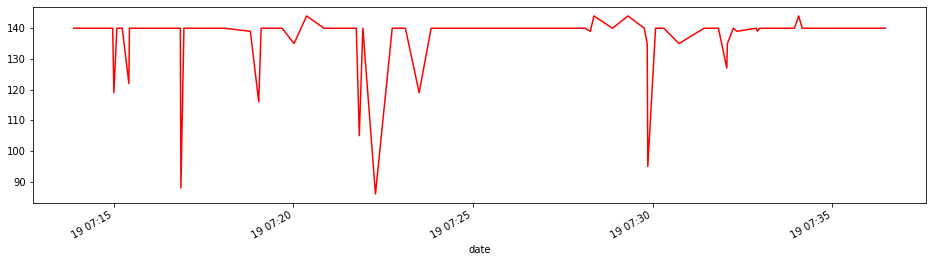

In [41]:
    # Time Series
    time_likes = pd.Series(data=df['len'].values, index=df['date'])
    time_likes.plot(figsize=(16, 4), color='r')
    #plt.show()
    
    #time_favs = pd.Series(data=df['likes'].values, index=df['date'])
    #time_favs.plot(figsize=(16, 4), color='r')
    #plt.show()

    #time_retweets = pd.Series(data=df['retweets'].values, index=df['date'])
    #time_retweets.plot(figsize=(16, 4), color='r')
    #plt.show()

    # Layered Time Series:
    #time_likes = pd.Series(data=df['likes'].values, index=df['date'])
    #time_likes.plot(figsize=(16, 4), label="likes", legend=True)

    #time_retweets = pd.Series(data=df['retweets'].values, index=df['date'])
    #time_retweets.plot(figsize=(16, 4), label="retweets", legend=True)
    #plt.show()

In [55]:
df['sentiment'] = np.array([tweet_analyzer.analyze_sentiment(tweet) for tweet in df['tweets']])

print(df.head(10))

                                              tweets  len                date  \
0  RT @NathanLerner: Dear Republicans, \n\nNext t...  140 2020-03-19 07:41:39   
1  RT @the_ecofeminist: I love the unified action...  140 2020-03-19 07:41:25   
2  RT @NathanLerner: Dear Republicans, \n\nNext t...  140 2020-03-19 07:40:37   
3  RT @NathanLerner: Dear Republicans, \n\nNext t...  140 2020-03-19 07:40:15   
4  RT @NathanLerner: Dear Republicans, \n\nNext t...  140 2020-03-19 07:40:05   
5  RT @the_ecofeminist: I love the unified action...  140 2020-03-19 07:40:03   
6  RT @NathanLerner: Dear Republicans, \n\nNext t...  140 2020-03-19 07:39:57   
7  RT @kelly_c_roache: PSA: Please avoid embracin...  139 2020-03-19 07:39:51   
8  RT @audreygarric: Sinon, voici un petit rappor...  140 2020-03-19 07:39:36   
9  When mankind cannot find a way, we still don't...  140 2020-03-19 07:39:32   

   likes  retweets language  sentiment  
0      0     40638       en         -1  
1      0         9       e

# External Resources

https://www.youtube.com/watch?v=wlnx-7cm4Gg